<a href="https://colab.research.google.com/github/FandiAR/py_datax/blob/main/Python_Basic_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
df = pd.read_csv('/content/StudentsPerformance.csv')
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


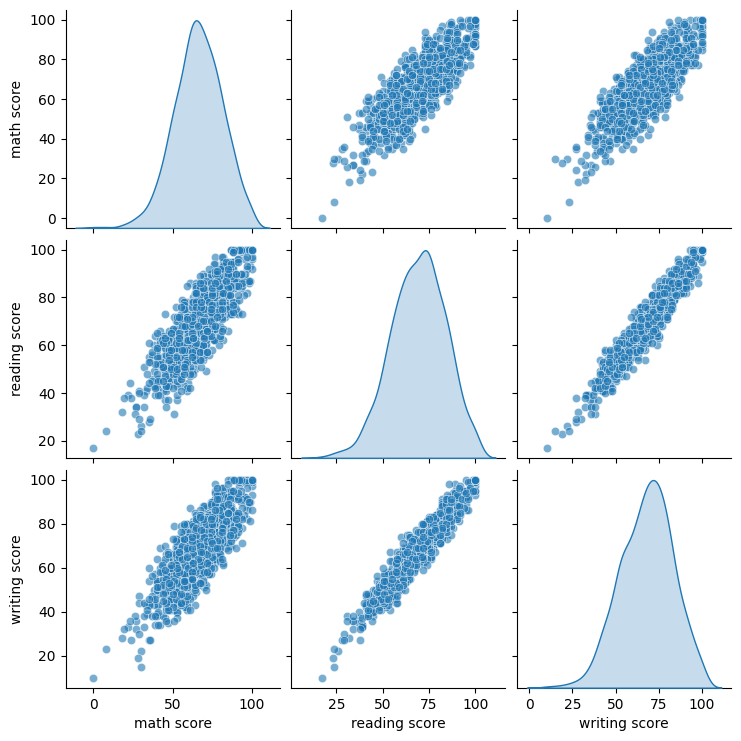

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt

# ambil hanya kolom numerik
numeric_cols = ["math score", "reading score", "writing score"]

# bikin pairplot
pairplotX = sns.pairplot(df[numeric_cols], diag_kind="kde", plot_kws={"alpha":0.6})
pairplotX

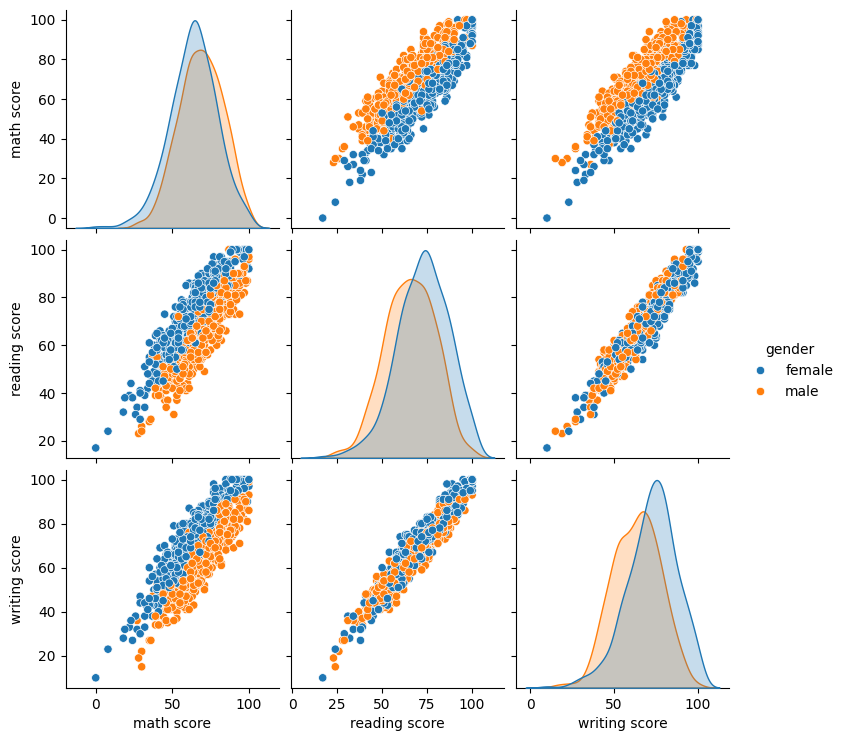

In [5]:
# pairplot dengan hue gender
sns.pairplot(df, vars=["math score", "reading score", "writing score"], hue="gender", diag_kind="kde")
plt.show()

In [7]:
# rata-rata nilai per gender
df.groupby("gender")[["math score", "reading score", "writing score"]].mean()

,math score,reading score,writing score
gender,,,
female,63.633205,72.608108,72.467181
male,68.728216,65.473029,63.311203


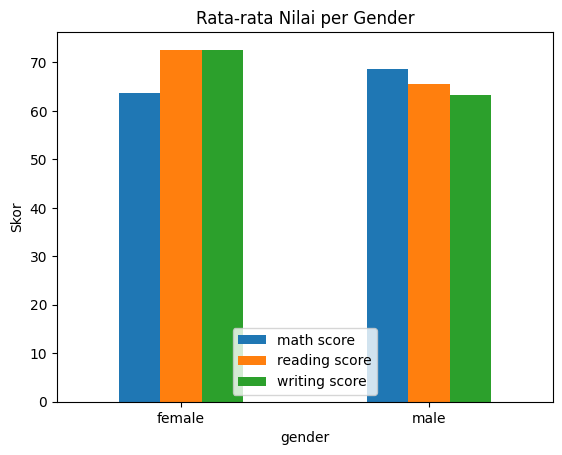

In [9]:
# visualisasi fokus belajar
avg_scores = df.groupby("gender")[["math score", "reading score", "writing score"]].mean().reset_index()

avg_scores.plot(x="gender", kind="bar")
plt.title("Rata-rata Nilai per Gender")
plt.ylabel("Skor")
plt.xticks(rotation=0)
plt.show()

Rata-rata nilai berdasarkan level of education parent:
  parental level of education  math score  reading score  writing score
0          associate's degree   67.882883      70.927928      69.896396
1           bachelor's degree   69.389831      73.000000      73.381356
2                 high school   62.137755      64.704082      62.448980
3             master's degree   69.745763      75.372881      75.677966
4                some college   67.128319      69.460177      68.840708
5            some high school   63.497207      66.938547      64.888268


<Figure size 1200x600 with 0 Axes>

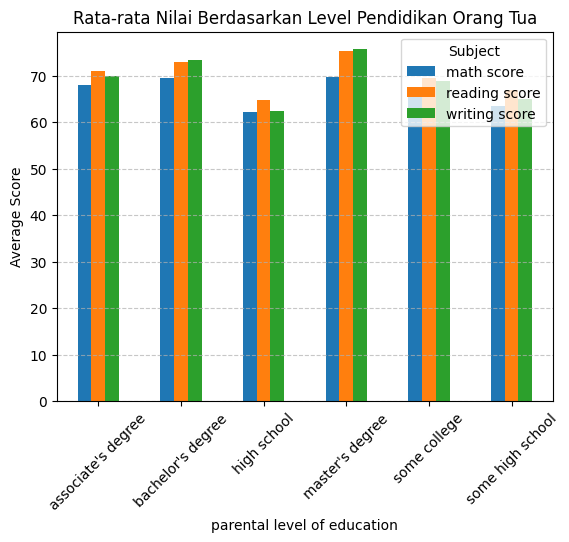

In [11]:
# pengaruh parental level of education terhadap nilai siswa
# Hitung rata-rata nilai berdasarkan level pendidikan orang tua
avg_scores_by_education = df.groupby("parental level of education")[["math score", "reading score", "writing score"]].mean().reset_index()

print("Rata-rata nilai berdasarkan level of education parent:")
print(avg_scores_by_education)

# Visualisasi rata-rata skor tiap mata pelajaran berdasarkan parental education
plt.figure(figsize=(12,6))
avg_scores_by_education.set_index("parental level of education").plot(kind="bar")
plt.title("Rata-rata Nilai Berdasarkan Level Pendidikan Orang Tua")
plt.ylabel("Average Score")
plt.xticks(rotation=45)
plt.legend(title="Subject")
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()

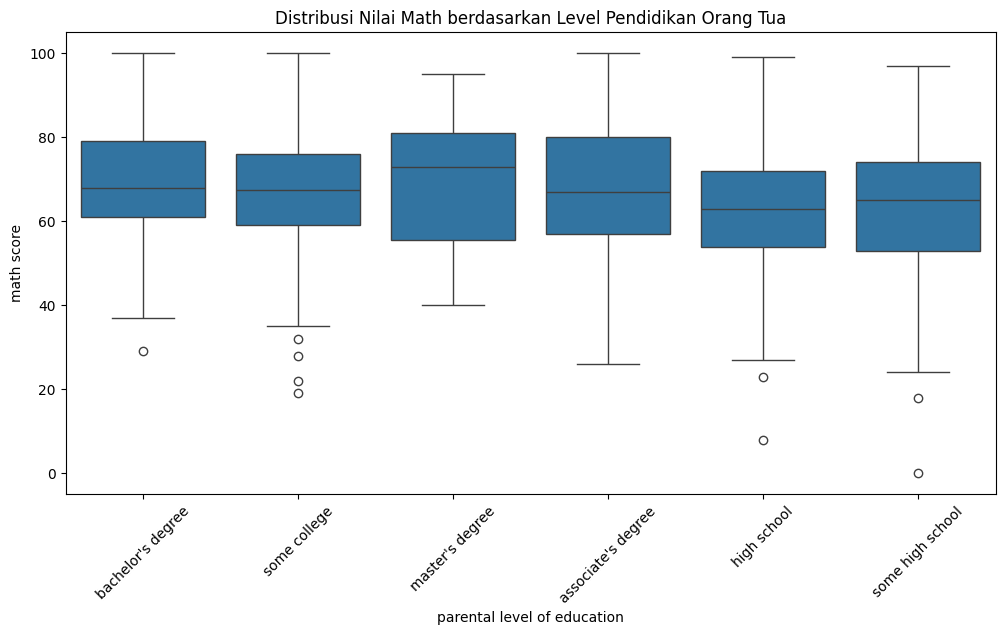

In [13]:
# Boxplot untuk distribusi nilai math berdasarkan parental education
plt.figure(figsize=(12,6))
sns.boxplot(x="parental level of education", y="math score", data=df)
plt.title("Distribusi Nilai Math berdasarkan Level Pendidikan Orang Tua")
plt.xticks(rotation=45)
plt.show()

   gender  total score
0  female       108111
1    male        95201


/tmp/ipython-input-3791834.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="gender", y="total score", data=total_score_gender, palette="Set2")


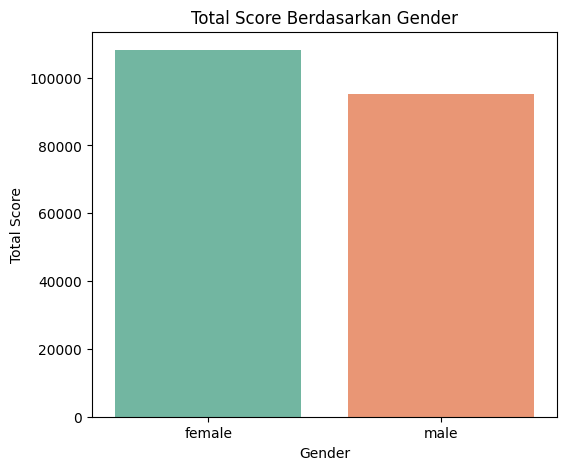

In [15]:
# Hitung total score berdasarkan gender
# Tambahkan kolom total score
df["total score"] = df["math score"] + df["reading score"] + df["writing score"]

# Hitung total score berdasarkan gender
total_score_gender = df.groupby("gender")["total score"].sum().reset_index()

print(total_score_gender)

# Visualisasi
plt.figure(figsize=(6,5))
sns.barplot(x="gender", y="total score", data=total_score_gender, palette="Set2")
plt.title("Total Score Berdasarkan Gender")
plt.ylabel("Total Score")
plt.xlabel("Gender")
plt.show()

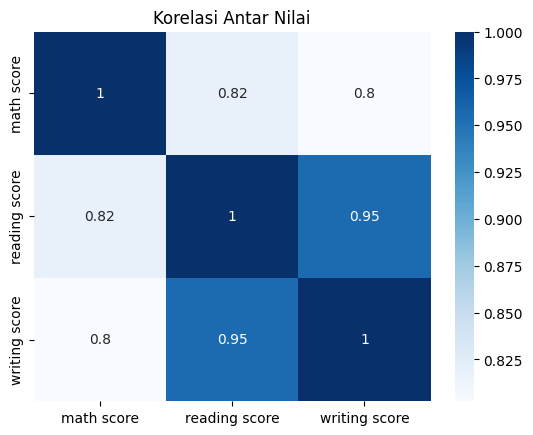

In [16]:
# korelasi antar nilai (Math vs Reading vs Writing)
sns.heatmap(df[["math score", "reading score", "writing score"]].corr(), annot=True, cmap="Blues")
plt.title("Korelasi Antar Nilai")
plt.show()
# Insight: Reading ↔ Writing punya korelasi sangat kuat (0.9+). Jadi, kalau bagus di reading, kemungkinan besar writing juga bagus.

/tmp/ipython-input-1796574078.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="test preparation course", y="total score", data=df, estimator=lambda x: sum(x)/len(x), palette="Set3")


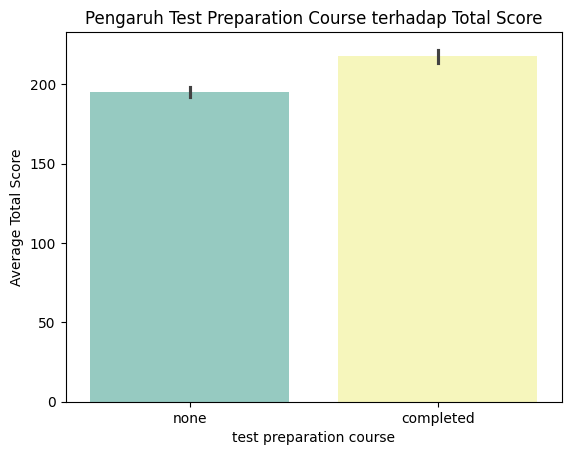

In [17]:
# Pengaruh Test Preparation Course
sns.barplot(x="test preparation course", y="total score", data=df, estimator=lambda x: sum(x)/len(x), palette="Set3")
plt.title("Pengaruh Test Preparation Course terhadap Total Score")
plt.ylabel("Average Total Score")
plt.show()
# Insight: siswa yang ikut test preparation course biasanya punya nilai lebih tinggi, terutama di math

   gender  math score  reading score  writing score
0  female   63.633205      72.608108      72.467181
1    male   68.728216      65.473029      63.311203


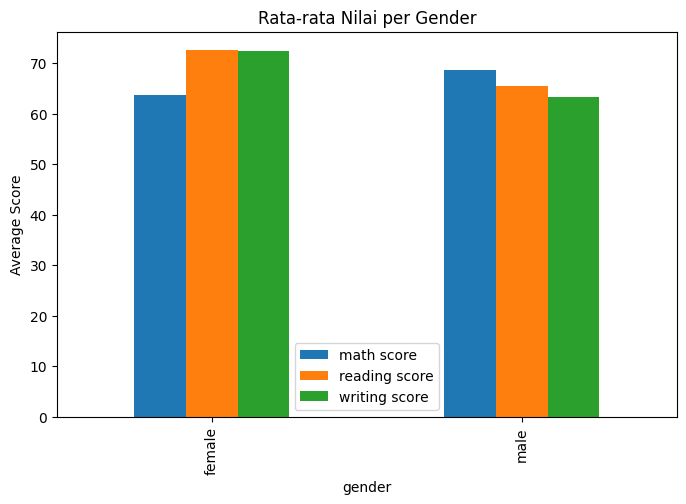

In [18]:
# Gap Gender di Tiap Subject
avg_by_gender = df.groupby("gender")[["math score", "reading score", "writing score"]].mean().reset_index()
print(avg_by_gender)

avg_by_gender.plot(x="gender", kind="bar", figsize=(8,5))
plt.title("Rata-rata Nilai per Gender")
plt.ylabel("Average Score")
plt.show()

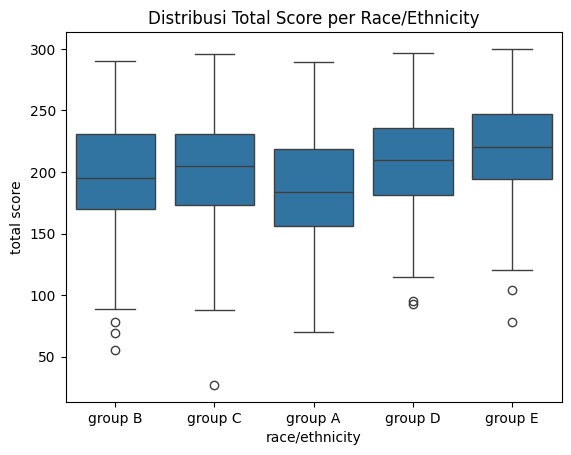

In [19]:
# Pengaruh Race/Ethnicity
sns.boxplot(x="race/ethnicity", y="total score", data=df)
plt.title("Distribusi Total Score per Race/Ethnicity")
plt.show()
# Insight: ada gap nilai antar kelompok etnis, tapi range nilainya juga overlap → artinya faktor lain (motivasi, environment, dll) berperan besar.

Rata-rata skor per gender:
    gender  math score  reading score  writing score
0  female   63.633205      72.608108      72.467181
1    male   68.728216      65.473029      63.311203

Gap skor female - male:
 gender            female       male       gap
math score     63.633205  68.728216 -5.095011
reading score  72.608108  65.473029  7.135079
writing score  72.467181  63.311203  9.155978

Ranking faktor penting untuk belajar apa:
 writing score    9.155978
reading score    7.135079
math score       5.095011
Name: gap, dtype: float64


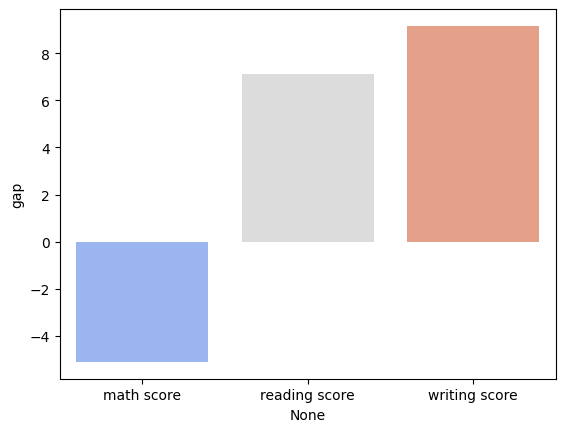

In [21]:
# Buat kolom total score
df["total score"] = df["math score"] + df["reading score"] + df["writing score"]

# Hitung rata-rata nilai tiap gender
avg_scores = df.groupby("gender")[["math score", "reading score", "writing score"]].mean().reset_index()
print("Rata-rata skor per gender:\n", avg_scores)

# Hitung gap antar gender
gap = avg_scores.set_index("gender").T
gap["gap"] = gap["female"] - gap["male"]
print("\nGap skor female - male:\n", gap)

# Ranking faktor penting untuk “belajar apa”
ranking = gap["gap"].abs().sort_values(ascending=False)
print("\nRanking faktor penting untuk belajar apa:\n", ranking)

# Visualisasi gap
sns.barplot(
    x=gap.index,
    y=gap["gap"],
    hue=gap.index,   # tambahin hue sesuai kategori
    palette="coolwarm",
    dodge=False
)
plt.legend([],[], frameon=False)
